# I. Introduction
---
<br>
Nama    : Hadyan Yusuf Imran<br>
Batch   : HCK-025<br>
<br>
Objective: This milestone focuses on developing a predictive model to help banks target customers more effectively using Logistic Regression, as well as optimizing the model through hyperparameter tuning. The results will be classified through data modeling and the goal is to predict whether a client will subscribe to a term deposit (yes/no).<br>

The evaluation metric that will be used is the recall value to minimize false negatives (customers who are interested in subscribing but are classified as not interested) so that good results can be obtained. In addition, the Cross Validation value will also be used to see how the model works in distinguishing the results of the Logistic Regression from other models.<br>

Problem: Develop a Logistic Regression model to predict whether a customer will subscribe to a term deposit or not and optimizing it through hyperparameter tuning. The model will be evaluated using Cross Validation Score. This project will be completed within four weeks to help banks improve bank customer targeting and campaign efficiency.

Justification: 
- https://economictimes.indiatimes.com/industry/banking/finance/banking/banks-need-to-redefine-deposit-mobilisation-strategy-tailormade-solutions-key-to-woo-depositors-says-federal-bank-md-shyam-srinivasan/articleshow/113300131.cms?from=mdr
- https://www.cuinsight.com/building-a-winning-deposit-strategy/
- https://theannapurnaexpress.com/story/50731/

Target User: Bank Marketing Department and Stakeholder.<br>

## Conceptual Problem

<b>1. Jelaskan latar belakang adanya bagging dan cara kerja bagging</b><br>

Bagging (Bootstrap Aggregating) was developed as a solution to improve the stability and accuracy of machine learning models that are prone to overfitting. This technique was introduced by Leo Breiman to overcome the drawbacks of high variance models, such as Decision Tree, which tend to overfit the training data and perform poorly on new data.

How Bagging Works:
- Bootstrap Sampling<br>
From the original dataset that has N samples, create several subsets of data (bootstrap samples) by random sampling with replacement.<br>
Each subset has the same size as the original dataset, but since the sampling is done with returns, some samples may appear more than once, and some may not be selected.

- Training Multiple Base Models<br>
For each retrieved subset, train a base learner model which is usually a Decision Tree or other model that has high variance.<br>
As each model is trained on different data, they will learn different patterns and rely less on the original data.

- Ensemble Prediction (Averaging or Majority Voting)<br>
For regression tasks: the average of the prediction results from all models is used as the final result.<br>
For classification task: majority voting is performed, where the class most voted by the models is used as the final result.<br>

<b>2. Jelaskan perbedaan cara kerja algoritma Random Forest dengan algoritma boosting yang Anda pilih</b><br>

Random Forest:

- Decision Tree Formation: In this process, only a random subset of features is considered at each splitting node. This ensures that the resulting trees are diverse and independent of each other.
- Node Division: Each tree is constructed by selecting features and split points that maximize the separation of the data into target classes or values.
- Voting/Averaging: Each tree in the Random Forest produces a result, then the majority result is taken as the final decision.

Logistic Regression:

- Based on Linear Models: Using linear equations to model the relationship between independent and target variables.
- Calculating Probability with Sigmoid Function: Logistic Regression predicts the probability of a class based on a linear combination of features.
- Determining Threshold: If the probability is greater than 0.5, the prediction is 1 (positive), if less than 0.5, then 0 (negative).

<b>3. Jelaskan apa yang dimaksud dengan Cross Validation</b><br>

Cross Validation is a technique in machine learning that is used to evaluate model performance by dividing the dataset into several parts to train and test the model in turn. This technique is used to ensure that the model created is not overfitting the training data and can generalize well to new data.

# II. Import Libraries
---

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
import matplotlib.pyplot as plt

from feature_engine.outliers import Winsorizer
from scipy.stats import skew, kendalltau
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder, StandardScaler


# III. Data Loading
---

## Load Dataset

In [2]:
# Read the dataset from bank.csv
df = pd.read_csv('bank.csv')

# Show the first 10 rows of the dataset
df.head(10)

,"age;""job"";""marital"";""education"";""default"";""balance"";""housing"";""loan"";""contact"";""day"";""month"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""y"""
0,"30;""unemployed"";""married"";""primary"";""no"";1787;..."
1,"33;""services"";""married"";""secondary"";""no"";4789;..."
2,"35;""management"";""single"";""tertiary"";""no"";1350;..."
3,"30;""management"";""married"";""tertiary"";""no"";1476..."
4,"59;""blue-collar"";""married"";""secondary"";""no"";0;..."
5,"35;""management"";""single"";""tertiary"";""no"";747;""..."
6,"36;""self-employed"";""married"";""tertiary"";""no"";3..."
7,"39;""technician"";""married"";""secondary"";""no"";147..."
8,"41;""entrepreneur"";""married"";""tertiary"";""no"";22..."
9,"43;""services"";""married"";""primary"";""no"";-88;""ye..."


The dataset cannot be displayed properly because the dataset still use semicolon (;) as separator.<br>
To fix this we have to acknowledge the delimiter in the form of a semicolon (;).

In [3]:
# Read the CSV file with ';' as delimiter
df = pd.read_csv('bank.csv', delimiter=';')

# Show the first 10 rows of the dataset
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
5,35,management,single,tertiary,no,747,no,no,cellular,23,feb,141,2,176,3,failure,no
6,36,self-employed,married,tertiary,no,307,yes,no,cellular,14,may,341,1,330,2,other,no
7,39,technician,married,secondary,no,147,yes,no,cellular,6,may,151,2,-1,0,unknown,no
8,41,entrepreneur,married,tertiary,no,221,yes,no,unknown,14,may,57,2,-1,0,unknown,no
9,43,services,married,primary,no,-88,yes,yes,cellular,17,apr,313,1,147,2,failure,no


In [4]:
# Check total data rows
df.shape[0]

4521

There are a total of 4521 rows in this data set.

In [5]:
# Rename columns
df = df.rename(columns = 
    {'poutcome' : 'outcome',
     'y' : 'subscribed'}
)


df.tail(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,outcome,subscribed
4511,46,blue-collar,married,secondary,no,668,yes,no,unknown,15,may,1263,2,-1,0,unknown,yes
4512,40,blue-collar,married,secondary,no,1100,yes,no,unknown,29,may,660,2,-1,0,unknown,no
4513,49,blue-collar,married,secondary,no,322,no,no,cellular,14,aug,356,2,-1,0,unknown,no
4514,38,blue-collar,married,secondary,no,1205,yes,no,cellular,20,apr,45,4,153,1,failure,no
4515,32,services,single,secondary,no,473,yes,no,cellular,7,jul,624,5,-1,0,unknown,no
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no
4520,44,entrepreneur,single,tertiary,no,1136,yes,yes,cellular,3,apr,345,2,249,7,other,no


Rename column 'y' to 'subscribed' to make it easier to understand.

In [6]:
# Check for duplicates
df.duplicated().sum()

0

There is no duplicate data in the dataset. The data is ready to be analyzed in EDA.

## Dataset Info

In [7]:
# Display data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   age         4521 non-null   int64 
 1   job         4521 non-null   object
 2   marital     4521 non-null   object
 3   education   4521 non-null   object
 4   default     4521 non-null   object
 5   balance     4521 non-null   int64 
 6   housing     4521 non-null   object
 7   loan        4521 non-null   object
 8   contact     4521 non-null   object
 9   day         4521 non-null   int64 
 10  month       4521 non-null   object
 11  duration    4521 non-null   int64 
 12  campaign    4521 non-null   int64 
 13  pdays       4521 non-null   int64 
 14  previous    4521 non-null   int64 
 15  outcome     4521 non-null   object
 16  subscribed  4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


This dataset consist of 16 columns with each data consisting of 10 columns of object type and 6 columns of integer type.<br>

Data information:<br>
- Age: Age of user
- Job: Job from user
- Marital: Marital status
- Education: Levels of education
- Default: Has credit in default?
- Balance: Average yearly balance
- Housing: Has housing loan?
- Loan: Has personal loan?
- Contact: Contact communication type
- Day: 	Last contact day of the week
- Month: Last contact month of year
- Duration: Last contact duration, in seconds
- Campaign: Number of contacts performed during this campaign and for this client
- Pdays: Number of days that passed by after the client was last contacted from a previous campaign
- Previous: Number of contacts performed before this campaign and for this client
- Outcome: Outcome of the previous marketing campaign
- Subscribed: Has the client subscribed a term deposit?

# IV. Exploratory Data Analysis (EDA)
---

## 1. Age Distribution Analysis

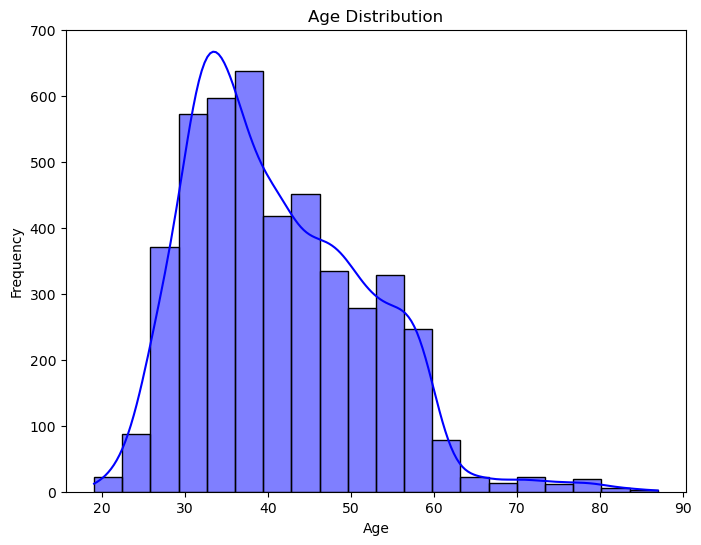

In [8]:
# Age Distribution
plt.figure(figsize=(8, 6))
sns.histplot(x=df['age'], bins=20, kde=True, color='blue')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

Analysis:
- Majority of customers are aged 30-40
- Number of customers declines after age 50
- Few young customers under 25 years which indicates banks are less attractive to the younger generation

Key Insights:
- Main customer target at age 30-40 years where economic conditions are stable
- Older people can be targeted with safer financial products such as deposits or health insurance
- Banks can create strategies to attract young customers such as digital accounts or credit card cashback

## 2. Job Distribution Analysis

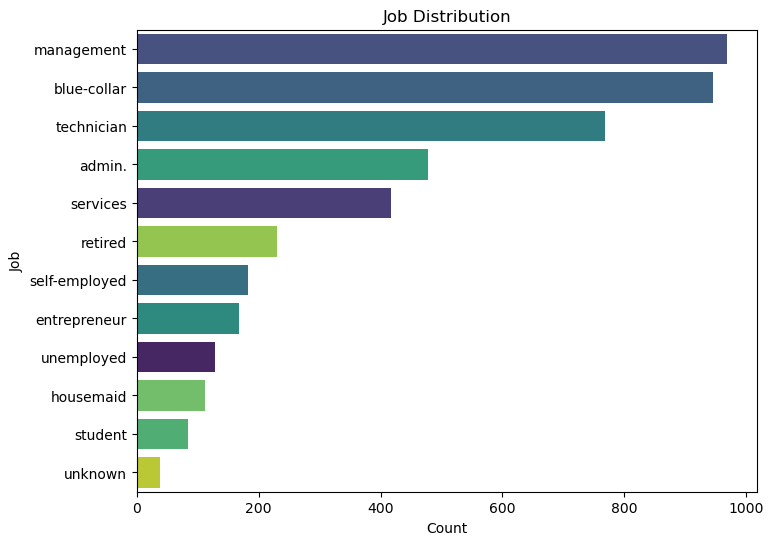

In [9]:
# Job Distribution
plt.figure(figsize=(8, 6))
sns.countplot(y=df['job'], order=df['job'].value_counts().index, hue=df['job'], palette="viridis")
plt.title("Job Distribution")
plt.xlabel("Count")
plt.ylabel("Job")
plt.show()


Analysis:
- The majority of customers come from the management, blue-collar, and technician sectors
- The number of retired customers is quite large
- The number of entrepreneurs and low-level skill entrepreneurs is relatively small

Key Insights:
- Customer segmentation based on occupation
- Product potential for retired people
- Opportunities in entrepreneur and low-level skill segments

## 3. Marital Status Analysis

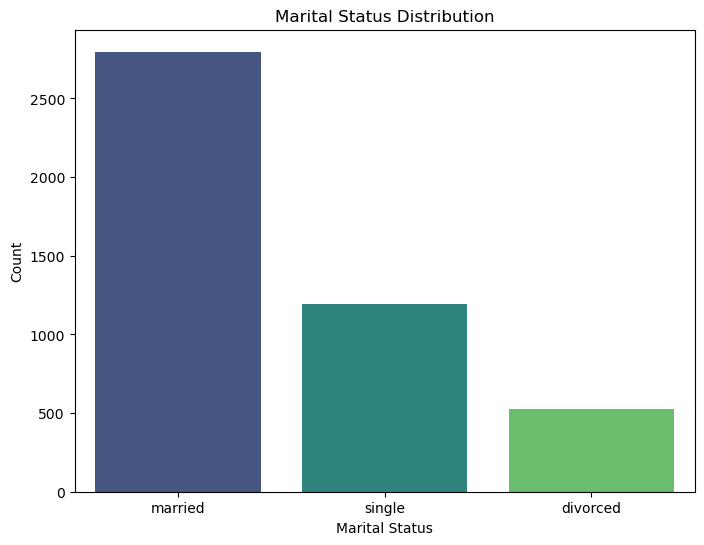

In [10]:
# Marital Status Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x=df['marital'], hue=df['marital'], palette="viridis")
plt.title("Marital Status Distribution")
plt.xlabel("Marital Status")
plt.ylabel("Count")
plt.show()

Analysis:
Key Insights:
- Majority of customers are married
- Singles customers are slightly significant
- Few divorced customers

Key Insights:
- Segmentation Based on Marital Status
- Focus on Married couple as the Primary Target
- Opportunity in the Single Group

## 4. Education Level Analysis

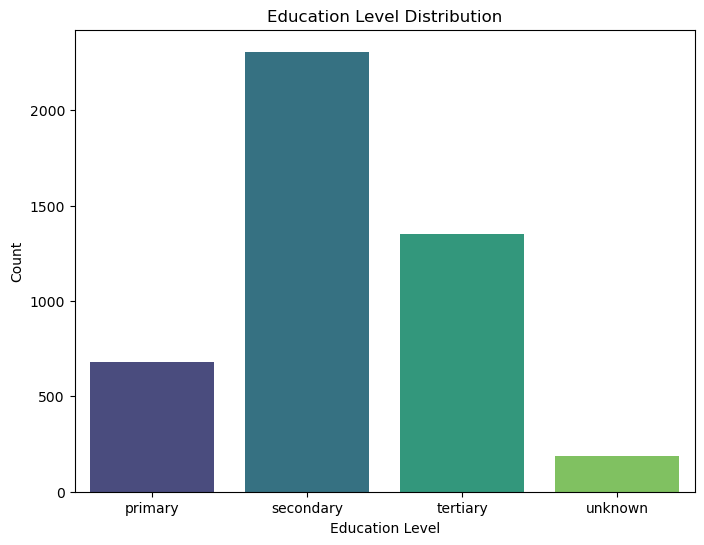

In [11]:
# Education Level Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x=df['education'], hue=df['education'], palette="viridis")
plt.title("Education Level Distribution")
plt.xlabel("Education Level")
plt.ylabel("Count")
plt.show()


Analysis:
- Majority of Customers Have Secondary Education
- Group with Tertiary Education is Also Significant
- Customers with Primary Education are Fewer

Key Insights:
- Segmentation by Education Level
- Opportunities in the Tertiary Group
- Financial Education for the Primary Group

## 5. Housing Loan Analysis

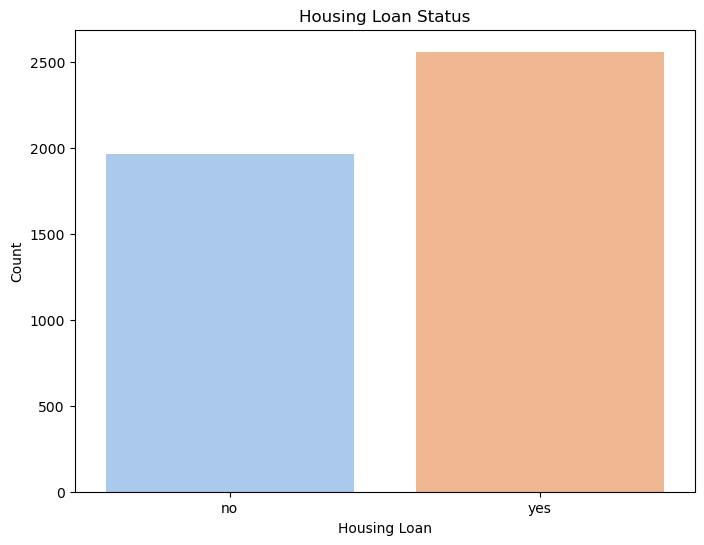

In [12]:
# Housing Loan Status
plt.figure(figsize=(8, 6))
sns.countplot(x=df['housing'], hue=df['housing'], palette="pastel")
plt.title("Housing Loan Status")
plt.xlabel("Housing Loan")
plt.ylabel("Count")
plt.show()


Analysis:
- Primary customers have home loans
- Proportion of customers without home loans also significant

Key Insights:
- Cross-selling opportunities to customers who already have housing loans
- Target market for home ownership credit

## 6. Loan Analysis

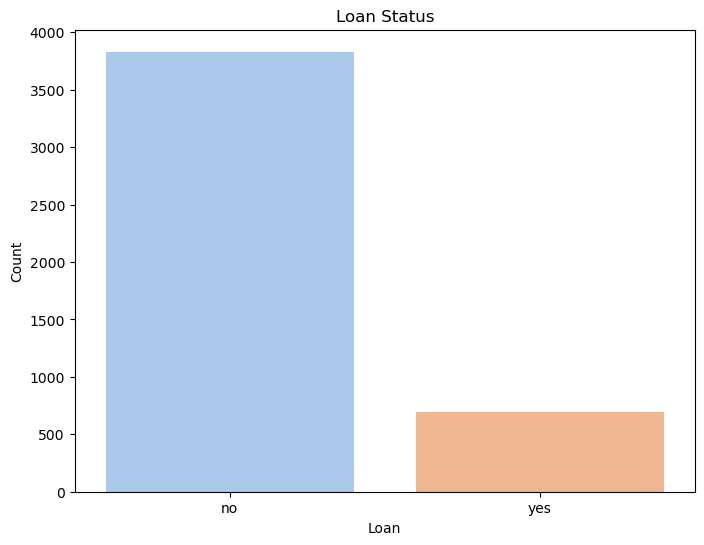

In [13]:
# Housing Loan Status
plt.figure(figsize=(8, 6))
sns.countplot(x=df['loan'], hue=df['loan'], palette="pastel")
plt.title("Loan Status")
plt.xlabel("Loan")
plt.ylabel("Count")
plt.show()


Analysis:
- Majority of Customers Do Not Have Personal Loans- Target Market
- ​​Group with Personal Loans is Very Small

Key Insights:
- Market Opportunity for Personal Credit Products
- Financial Education to Increase Loan Adoption

## 7. Target Class Distribution Analysis

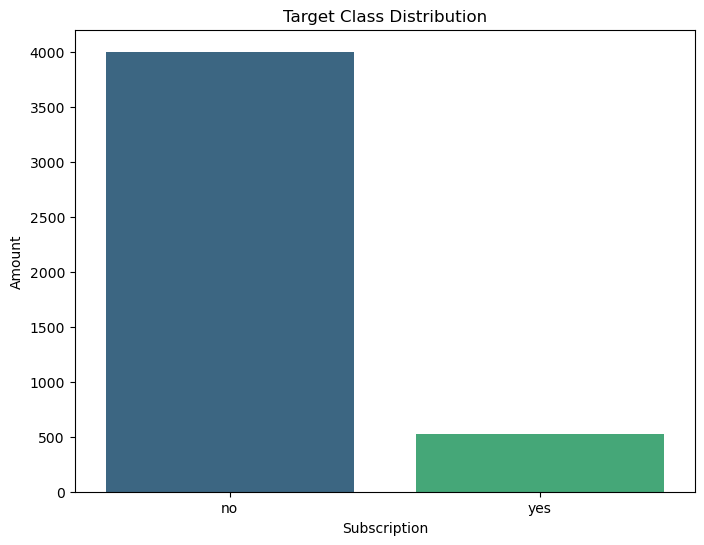

In [14]:
# Target Class Distribution
plt.figure(figsize=(8,6))
sns.countplot(x=df['subscribed'], hue=df['subscribed'], palette="viridis")
plt.title("Target Class Distribution")
plt.xlabel("Subscription")
plt.ylabel("Amount")
plt.show()

Analysis:
- Imbalanced target class (Imbalanced dataset)
- Low conversion rate
- Opportunity to increase subscription rate

Key Insights:
- Dealing with imbalanced datasets is a must for modeling
- Need for more effective marketing strategies
- Potential for cross-selling or upselling

# V. Feature Engineering
---

## Feature Selection

Based on my personal judgment, I will drop the 'day', 'month', and 'pdays' columns because they have little impact on people's willingness to subscribe<br><br>
Day: The last day a customer was contacted is not significant for long-term prediction.<br>
Month: The month the customer was contacted, for the same reason as day. There is already a duration column: The duration of the last contact is sufficient for modeling.<br>
Pdays: Contains many -1 values ​​(never been contacted before) I would also remove it because it includes both categories and numerics in one column.

In [15]:
# Select numeric and categorical features
num_features = ['age', 'balance', 'duration', 'campaign', 'previous']
cat_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'outcome']

Numeric features correlation check:<br>

I will use Kendall Tau for this correlation testing because the data is numerical and the output is categorical: subscribed (yes / no).

In [16]:
# Perform Kendall's Tau correlation test for each numerical feature against the target
kendall_results = {}
for feature in num_features:
    tau, p_value = kendalltau(df[feature], df['subscribed'])
    kendall_results[feature] = {'kendall_tau': tau, 'p-value': p_value}

# Convert results to DataFrame for better visualization
kendall_df = pd.DataFrame(kendall_results).T.sort_values(by='p-value')

# Show results
kendall_df

,kendall_tau,p-value
duration,0.284819,2.328322e-121
previous,0.159586,1.054926e-28
balance,0.064695,1.096034e-07
campaign,-0.058363,1.399672e-05
age,0.013477,2.739941e-01


The age column based on Kendall tau (0.0135) is very small and has almost no relationship.<br>
The age column based on p-value (0.2739 > 0.05) Not significant → Can be considered for dropping.

Categorical features correlation check:

In [17]:
# Encode categorical variables for chi-square test
df_encoded = df.copy()
label_encoders = {}
for col in cat_features:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le

# Chi-Square test for categorical features
X_cat = df_encoded[cat_features]
y = df_encoded['subscribed']
chi2_selector = SelectKBest(chi2, k='all')
chi2_selector.fit(X_cat, y)
chi2_scores = pd.Series(chi2_selector.scores_, index=cat_features).sort_values(ascending=False)

# Show results
chi2_scores

contact      100.510079
housing       21.500801
loan          19.045258
outcome       11.868708
job            8.154597
education      3.802675
marital        0.320397
default        0.007543
dtype: float64

Features with low scores such as education (3.80), marital (0.32), default (0.0075) can be considered for dropping because they are not significantly correlated with target.

In [18]:
# Drop unrelated features
df = df.drop(columns=['age', 'day', 'month', 'pdays', 'default'])

Based on correlation check and personal judgement 'day', 'month', 'pdays', and 'default' column are considered less influential so I will drop them.

## Handling Cardinality

In [19]:
# Select numeric and categorical features
num_features = ['balance', 'duration', 'campaign', 'previous']
cat_features = ['job', 'marital', 'education', 'housing', 'loan', 'contact', 'outcome']

In [20]:
# Cardinality Check
cardinality = df[cat_features].nunique().sort_values(ascending=False)
cardinality

job          12
education     4
outcome       4
marital       3
contact       3
housing       2
loan          2
dtype: int64

From this data we can analyze:<br>
- High cardinality features: Job
- Medium cardinality features: Education, Outcome
- Low Cardinality: Marital, Contact, Default, Housing, Loan

From all the columns, there is 1 high cardinality column, namely the job column, so the categories will be grouped into 3 choices, namely high_skill, low_skill, and unknown.

In [21]:
# Category Grouping for 'job'
job_mapping = {
    'technician': 'high_skill', 'management': 'high_skill', 'entrepreneur': 'high_skill',
    'blue-collar': 'low_skill', 'services': 'low_skill', 'admin.': 'low_skill', 'self-employed': 'low_skill', 'housemaid': 'low_skill',
    'student': 'no_skill', 'unemployed': 'no_skill', 'retired': 'no_skill', 'unknown': 'no_skill'
}
df['job'] = df['job'].map(job_mapping)

# One-Hot Encoding for jobs after grouping 
df = pd.get_dummies(df, columns=['job'])
df[['job_high_skill', 'job_low_skill', 'job_no_skill']] = df[['job_high_skill', 'job_low_skill', 'job_no_skill']].astype(int)

# Show preprocessing results
df.head()

,marital,education,balance,housing,loan,contact,duration,campaign,previous,outcome,subscribed,job_high_skill,job_low_skill,job_no_skill
0,married,primary,1787,no,no,cellular,79,1,0,unknown,no,0,0,1
1,married,secondary,4789,yes,yes,cellular,220,1,4,failure,no,0,1,0
2,single,tertiary,1350,yes,no,cellular,185,1,1,failure,no,1,0,0
3,married,tertiary,1476,yes,yes,unknown,199,4,0,unknown,no,1,0,0
4,married,secondary,0,yes,no,unknown,226,1,0,unknown,no,0,1,0


## Data Spliting

In [22]:
# Splitting between 'x' and 'y'
x = df.drop(['subscribed'], axis = 1)
y = df['subscribed']
x

,marital,education,balance,housing,loan,contact,duration,campaign,previous,outcome,job_high_skill,job_low_skill,job_no_skill
0,married,primary,1787,no,no,cellular,79,1,0,unknown,0,0,1
1,married,secondary,4789,yes,yes,cellular,220,1,4,failure,0,1,0
2,single,tertiary,1350,yes,no,cellular,185,1,1,failure,1,0,0
3,married,tertiary,1476,yes,yes,unknown,199,4,0,unknown,1,0,0
4,married,secondary,0,yes,no,unknown,226,1,0,unknown,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,married,secondary,-333,yes,no,cellular,329,5,0,unknown,0,1,0
4517,married,tertiary,-3313,yes,yes,unknown,153,1,0,unknown,0,1,0
4518,married,secondary,295,no,no,cellular,151,11,0,unknown,1,0,0
4519,married,secondary,1137,no,no,cellular,129,4,3,other,0,1,0


In [23]:
# Splitting between train and test
x_train,x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
print('Train Size: ', x_train.shape)
print('Test Size: ', x_test.shape)

Train Size:  (3616, 13)
Test Size:  (905, 13)


## Handling Missing Value

In [24]:
# Check missing value in x_train
x_train.isnull().sum()

marital           0
education         0
balance           0
housing           0
loan              0
contact           0
duration          0
campaign          0
previous          0
outcome           0
job_high_skill    0
job_low_skill     0
job_no_skill      0
dtype: int64

In [25]:
# Check missing value in x_test
x_test.isnull().sum()

marital           0
education         0
balance           0
housing           0
loan              0
contact           0
duration          0
campaign          0
previous          0
outcome           0
job_high_skill    0
job_low_skill     0
job_no_skill      0
dtype: int64

The data has no missing values, ready to be checked for outliers.

## Handling Outliers

Check distribution data

In [26]:
# Check skewness value
skewness_values = x_train[num_features].apply(skew)
print(skewness_values)

balance     4.225654
duration    2.644425
campaign    4.819170
previous    6.139814
dtype: float64


Analyze
- Age: A little skewed to right
- Balance, Duration, Campaign, and Previous: Very skewed to the right

Check Outlier

In [27]:
# Check outlier
def detect_outlier_iqr(x_train, column):
    '''
    Function to detect outlier with IQR
    '''
    Q1 = np.percentile(x_train[column], 25)
    Q3 = np.percentile(x_train[column], 75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = x_train[(x_train[column] < lower_bound) | (x_train[column] > upper_bound)]
    return outliers

In [28]:
# Select features that need to be checked for outliers
outlier_features = ['balance', 'duration', 'campaign', 'previous']

# Save outlier results for each feature
outlier_dict = {feature: detect_outlier_iqr(x_train, feature) for feature in outlier_features}

# Displays the number of outliers for each feature
outlier_counts = {feature: len(outliers) for feature, outliers in outlier_dict.items()}

# Convert results to DataFrame
outlier_x_train = pd.DataFrame(list(outlier_counts.items()), columns=['Feature', 'Outlier Count'])

# Show results
print(outlier_x_train)

    Feature  Outlier Count
0   balance            400
1  duration            248
2  campaign            259
3  previous            652


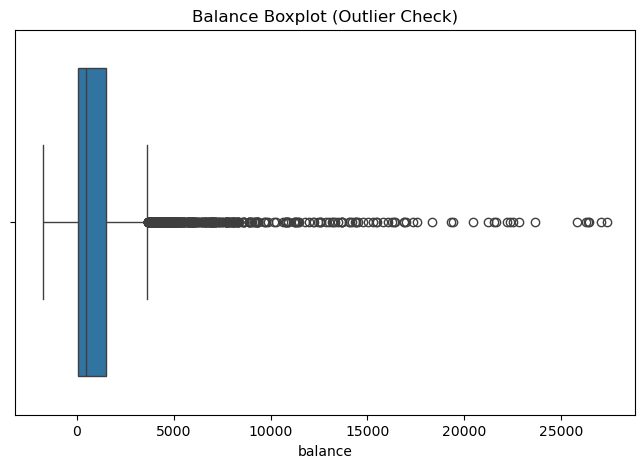

In [29]:
# Check balance outlier with boxplot
plt.figure(figsize=(8,5))
sns.boxplot(x=x_train['balance'])
plt.title("Balance Boxplot (Outlier Check)")
plt.show()

Capping with Winsorizer to reduce the impact of outliers without removing premium customers.

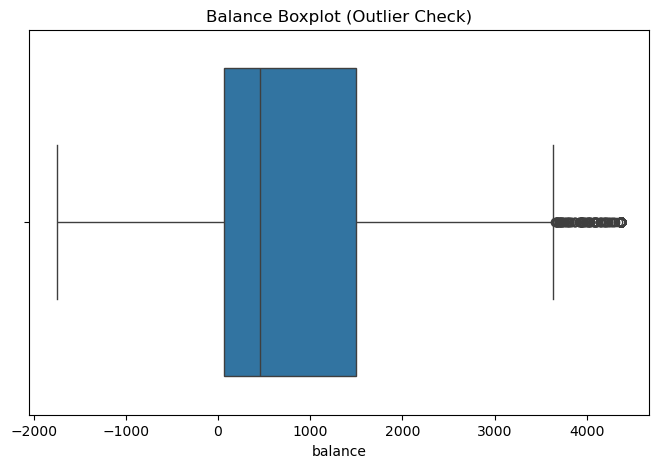

In [30]:
# Capping outlier with Winsorizer
capper = Winsorizer(
    capping_method='iqr',  # Using the IQR method (because the data is not normal and has extreme outliers)
    tail='right',  # Handling outliers on the right side (upper bound)
    fold=2,  # Fold is larger than the default (1.5) because the data is very skewed.
    variables=['balance']
)

# Training Winsorizer on training data
capper.fit(x_train)

# Applying Winsorizing to training data
x_train = capper.transform(x_train)

# Check balance outlier with boxplot
plt.figure(figsize=(8,5))
sns.boxplot(x=x_train['balance'])
plt.title("Balance Boxplot (Outlier Check)")
plt.show()

Balance after winsorizing:
- Right hand side limit has been reduced, but there are still some small outliers.
- Values ​​that previously reached 70,000+ have been controlled.
- Skewness is reduced and data distribution is more centered around the median.

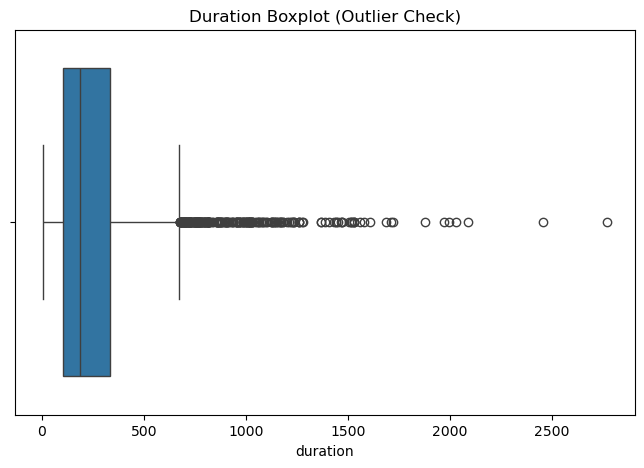

In [31]:
# Check duration outlier with boxplot
plt.figure(figsize=(8,5))
sns.boxplot(x=x_train['duration'])
plt.title("Duration Boxplot (Outlier Check)")
plt.show()

Capping to prevent model bias due to extreme call durations.

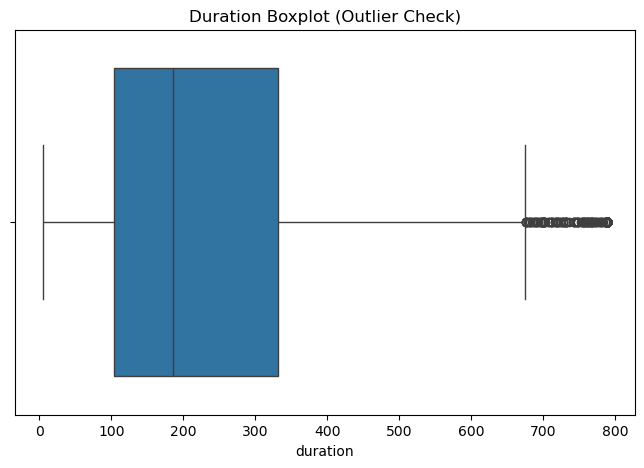

In [32]:
# Capping outlier with Winsorizer
capper = Winsorizer(
    capping_method='iqr',
    tail='right',
    fold=2, # Fold is larger than the default (1.5) because the data is very skewed.
    variables=['duration']
)

# Training Winsorizer on training data
capper.fit(x_train)

# Applying Winsorizing to training data
x_train = capper.transform(x_train)

# Check duration outlier with boxplot
plt.figure(figsize=(8,5))
sns.boxplot(x=x_train['duration'])
plt.title("Duration Boxplot (Outlier Check)")
plt.show()

Duration after winsorizing:
- Right hand side limit has been reduced, but there are still some small outliers.
- The distribution is more stable than before, with the median in the middle.
- There are still some outliers on the right side (greater than ~700 seconds), but in smaller numbers than before capping.

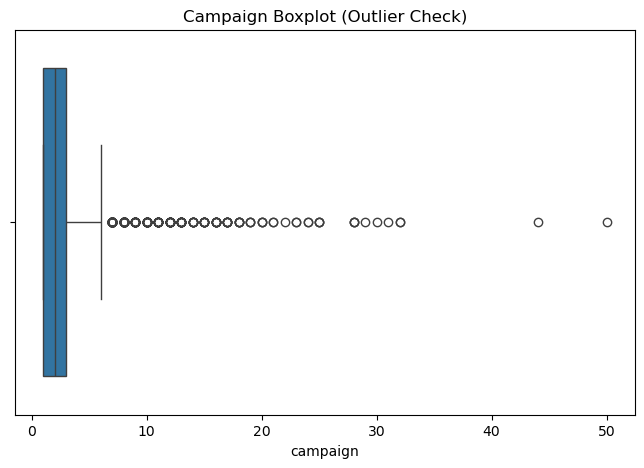

In [33]:
# Check campaign outlier with boxplot
plt.figure(figsize=(8,5))
sns.boxplot(x=x_train['campaign'])
plt.title("Campaign Boxplot (Outlier Check)")
plt.show()

Capping to control the influence of customers who receive extreme campaigns.

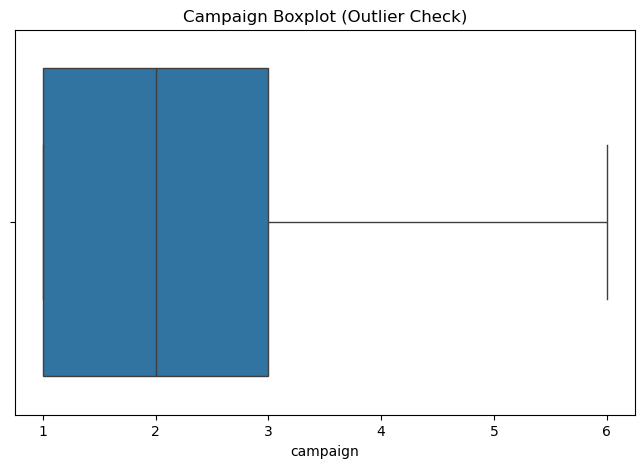

In [34]:
# Capping outlier with Winsorizer
capper = Winsorizer(
    capping_method='iqr',
    tail='right',
    fold=1.5, # Fold is larger than the default (1.5) because the data is very skewed.
    variables=['campaign']
)

# Training Winsorizer on training data
capper.fit(x_train)

# Applying Winsorizing to training data
x_train = capper.transform(x_train)

# Check duration outlier with boxplot
plt.figure(figsize=(8,5))
sns.boxplot(x=x_train['campaign'])
plt.title("Campaign Boxplot (Outlier Check)")
plt.show()

Campaign after winsorizing:
- There are no more outliers in the campaign boxplot.
- The upper limit has been capped at around 6 campaigns, indicating that outliers above 6 have been capped.
- The data distribution is more balanced, with the median around 2.

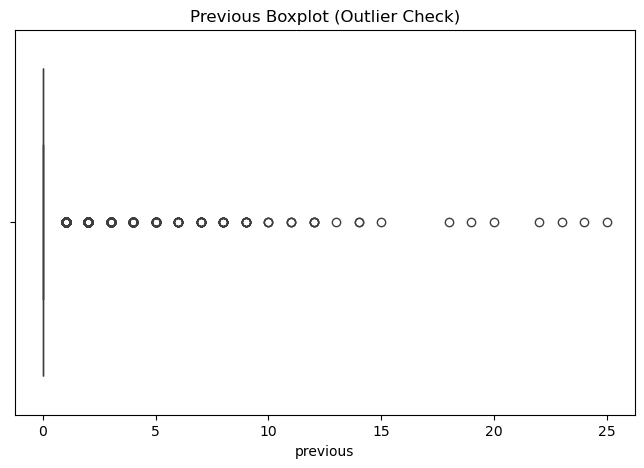

In [35]:
# Check campaign outlier with boxplot
plt.figure(figsize=(8,5))
sns.boxplot(x=x_train['previous'])
plt.title("Previous Boxplot (Outlier Check)")
plt.show()

Winsorizing to reduce the impact of customers who have a very high number of interactions.

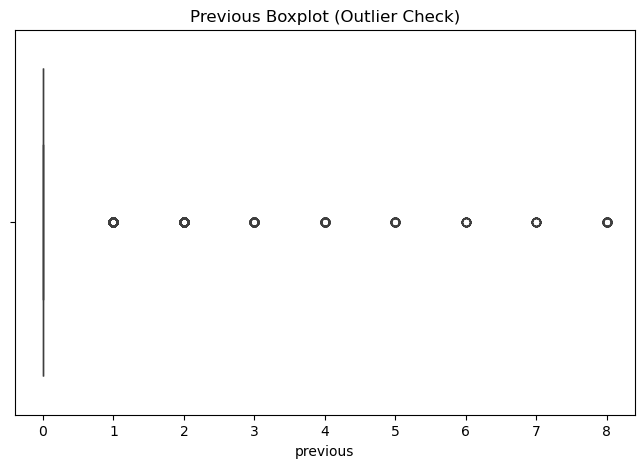

In [36]:
# Capping outlier with Winsorizer
capper = Winsorizer(
    capping_method='quantiles', # Using quantiles for capping discontinuous data
    tail='right',
    fold=0.01, # Cap 1% highest data
    variables=['previous']
)

# Training Winsorizer on training data
capper.fit(x_train)

# Applying Winsorizing to training data
x_train = capper.transform(x_train)

# Check duration outlier with boxplot
plt.figure(figsize=(8,5))
sns.boxplot(x=x_train['previous'])
plt.title("Previous Boxplot (Outlier Check)")
plt.show()

Previous after winsorizing:
- Capping successfully reduces the extreme values, but the distribution still shows discrete outliers.
- The maximum value is now smaller than before capping.
- The boxplot shows that previous still has outlier points, but this is normal due to its nature as a discrete variable.

# VI. Model Definition
---

Check skewness value for data scaler.

In [37]:
# Check skewness value
skewness_values = x_train[num_features].apply(skew)
print(skewness_values)

balance     1.323252
duration    1.269029
campaign    1.087255
previous    3.512114
dtype: float64


From the skewness values after outlier handling, the data is approaching normal distribution with small outlier so I will use the StandardScaler method to do scaling.<br>
Since the number of categories is not too large and without any order, I will do the encoding with OneHotEncoder.<br>
For jobs, because they have been encoded, they will go into num_features because they no longer need to be encoded.


In [38]:
# Splitting new numeric and categorical features
num_features = ['balance', 'duration', 'campaign', 'previous', 'job_high_skill', 'job_low_skill', 'job_no_skill']
ordinal_features = ['education'] # There is an order.
onehot_features = ['marital', 'contact', 'outcome', 'housing', 'loan'] # No order, just unique categories.

# Mapping for OrdinalEncoder
education_order = [['primary', 'secondary', 'tertiary', 'unknown']]

I will compare models using Logistic Regression and Decision Tree.

In [39]:
# Define ColumnTransformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('ordinal', OrdinalEncoder(categories=education_order), ordinal_features),
        ('onehot', OneHotEncoder(handle_unknown='ignore'), onehot_features)
    ]
)

# Define ColumnTransformer for preprocessing Decision Tree
preprocessor_noscale = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', num_features),
        ('ordinal', OrdinalEncoder(categories=education_order), ordinal_features),
        ('onehot', OneHotEncoder(handle_unknown='ignore'), onehot_features)
    ]
)

## Logistic Regression Pipeline

In [40]:
# Logistic regression pipeline
lr_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, class_weight="balanced", random_state=42)) # Using Weight Balancing because data is imbalance
])

lr_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['balance', 'duration',
                                                   'campaign', 'previous',
                                                   'job_high_skill',
                                                   'job_low_skill',
                                                   'job_no_skill']),
                                                 ('ordinal',
                                                  OrdinalEncoder(categories=[['primary',
                                                                              'secondary',
                                                                              'tertiary',
                                                                              'unknown']]),
                                                  ['education']),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['marital', 'contact',
                                                   'outcome', 'housing',
                                                   'loan'])])),
                ('classifier',
                 LogisticRegression(class_weight='balanced', max_iter=1000,
                                    random_state=42))])

## KNN Pipeline

In [41]:
# KNN pipeline
knn_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier(n_neighbors=5)) # Using Weight Balancing because data is imbalance
])

knn_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['balance', 'duration',
                                                   'campaign', 'previous',
                                                   'job_high_skill',
                                                   'job_low_skill',
                                                   'job_no_skill']),
                                                 ('ordinal',
                                                  OrdinalEncoder(categories=[['primary',
                                                                              'secondary',
                                                                              'tertiary',
                                                                              'unknown']]),
                                                  ['education']),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['marital', 'contact',
                                                   'outcome', 'housing',
                                                   'loan'])])),
                ('classifier', KNeighborsClassifier())])

## SVM Pipeline

In [42]:
# SVM pipeline
svm_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', SVC(kernel='rbf', probability=True, class_weight="balanced", random_state=42)) # Using Weight Balancing because data is imbalance
])

svm_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['balance', 'duration',
                                                   'campaign', 'previous',
                                                   'job_high_skill',
                                                   'job_low_skill',
                                                   'job_no_skill']),
                                                 ('ordinal',
                                                  OrdinalEncoder(categories=[['primary',
                                                                              'secondary',
                                                                              'tertiary',
                                                                              'unknown']]),
                                                  ['education']),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['marital', 'contact',
                                                   'outcome', 'housing',
                                                   'loan'])])),
                ('classifier',
                 SVC(class_weight='balanced', probability=True,
                     random_state=42))])

## Decision Tree Pipeline

In [43]:
# Decision tree pipeline
dt_pipeline = Pipeline([
    ('preprocessor', preprocessor_noscale),
    ('classifier', DecisionTreeClassifier(class_weight="balanced", max_depth=10, random_state=42)) # Using Weight Balancing because data is imbalance
])

dt_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  ['balance', 'duration',
                                                   'campaign', 'previous',
                                                   'job_high_skill',
                                                   'job_low_skill',
                                                   'job_no_skill']),
                                                 ('ordinal',
                                                  OrdinalEncoder(categories=[['primary',
                                                                              'secondary',
                                                                              'tertiary',
                                                                              'unknown']]),
                                                  ['education']),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['marital', 'contact',
                                                   'outcome', 'housing',
                                                   'loan'])])),
                ('classifier',
                 DecisionTreeClassifier(class_weight='balanced', max_depth=10,
                                        random_state=42))])

## Random Forest Pipeline

In [44]:
# Decision tree pipeline
rf_pipeline = Pipeline([
    ('preprocessor', preprocessor_noscale),
    ('classifier', RandomForestClassifier(n_estimators=100, max_depth=10, class_weight="balanced", random_state=42)) # Using Weight Balancing because data is imbalance
])

rf_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  ['balance', 'duration',
                                                   'campaign', 'previous',
                                                   'job_high_skill',
                                                   'job_low_skill',
                                                   'job_no_skill']),
                                                 ('ordinal',
                                                  OrdinalEncoder(categories=[['primary',
                                                                              'secondary',
                                                                              'tertiary',
                                                                              'unknown']]),
                                                  ['education']),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['marital', 'contact',
                                                   'outcome', 'housing',
                                                   'loan'])])),
                ('classifier',
                 RandomForestClassifier(class_weight='balanced', max_depth=10,
                                        random_state=42))])

## Boosting Pipeline

In [45]:
# Decision tree pipeline
gb_pipeline = Pipeline([
    ('preprocessor', preprocessor_noscale),
    ('classifier', GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)) # Using Weight Balancing because data is imbalance
])

gb_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  ['balance', 'duration',
                                                   'campaign', 'previous',
                                                   'job_high_skill',
                                                   'job_low_skill',
                                                   'job_no_skill']),
                                                 ('ordinal',
                                                  OrdinalEncoder(categories=[['primary',
                                                                              'secondary',
                                                                              'tertiary',
                                                                              'unknown']]),
                                                  ['education']),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['marital', 'contact',
                                                   'outcome', 'housing',
                                                   'loan'])])),
                ('classifier', GradientBoostingClassifier(random_state=42))])

# VII. Model Training
---

In [46]:
# Logistic regression model training
lr_pipeline.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['balance', 'duration',
                                                   'campaign', 'previous',
                                                   'job_high_skill',
                                                   'job_low_skill',
                                                   'job_no_skill']),
                                                 ('ordinal',
                                                  OrdinalEncoder(categories=[['primary',
                                                                              'secondary',
                                                                              'tertiary',
                                                                              'unknown']]),
                                                  ['education']),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['marital', 'contact',
                                                   'outcome', 'housing',
                                                   'loan'])])),
                ('classifier',
                 LogisticRegression(class_weight='balanced', max_iter=1000,
                                    random_state=42))])

In [47]:
# KNN model training
knn_pipeline.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['balance', 'duration',
                                                   'campaign', 'previous',
                                                   'job_high_skill',
                                                   'job_low_skill',
                                                   'job_no_skill']),
                                                 ('ordinal',
                                                  OrdinalEncoder(categories=[['primary',
                                                                              'secondary',
                                                                              'tertiary',
                                                                              'unknown']]),
                                                  ['education']),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['marital', 'contact',
                                                   'outcome', 'housing',
                                                   'loan'])])),
                ('classifier', KNeighborsClassifier())])

In [48]:
# SVM model training
svm_pipeline.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['balance', 'duration',
                                                   'campaign', 'previous',
                                                   'job_high_skill',
                                                   'job_low_skill',
                                                   'job_no_skill']),
                                                 ('ordinal',
                                                  OrdinalEncoder(categories=[['primary',
                                                                              'secondary',
                                                                              'tertiary',
                                                                              'unknown']]),
                                                  ['education']),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['marital', 'contact',
                                                   'outcome', 'housing',
                                                   'loan'])])),
                ('classifier',
                 SVC(class_weight='balanced', probability=True,
                     random_state=42))])

In [49]:
# Decision tree model training
dt_pipeline.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  ['balance', 'duration',
                                                   'campaign', 'previous',
                                                   'job_high_skill',
                                                   'job_low_skill',
                                                   'job_no_skill']),
                                                 ('ordinal',
                                                  OrdinalEncoder(categories=[['primary',
                                                                              'secondary',
                                                                              'tertiary',
                                                                              'unknown']]),
                                                  ['education']),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['marital', 'contact',
                                                   'outcome', 'housing',
                                                   'loan'])])),
                ('classifier',
                 DecisionTreeClassifier(class_weight='balanced', max_depth=10,
                                        random_state=42))])

In [50]:
# Random forest model training
rf_pipeline.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  ['balance', 'duration',
                                                   'campaign', 'previous',
                                                   'job_high_skill',
                                                   'job_low_skill',
                                                   'job_no_skill']),
                                                 ('ordinal',
                                                  OrdinalEncoder(categories=[['primary',
                                                                              'secondary',
                                                                              'tertiary',
                                                                              'unknown']]),
                                                  ['education']),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['marital', 'contact',
                                                   'outcome', 'housing',
                                                   'loan'])])),
                ('classifier',
                 RandomForestClassifier(class_weight='balanced', max_depth=10,
                                        random_state=42))])

In [51]:
# Gradient boosting model training
gb_pipeline.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  ['balance', 'duration',
                                                   'campaign', 'previous',
                                                   'job_high_skill',
                                                   'job_low_skill',
                                                   'job_no_skill']),
                                                 ('ordinal',
                                                  OrdinalEncoder(categories=[['primary',
                                                                              'secondary',
                                                                              'tertiary',
                                                                              'unknown']]),
                                                  ['education']),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['marital', 'contact',
                                                   'outcome', 'housing',
                                                   'loan'])])),
                ('classifier', GradientBoostingClassifier(random_state=42))])

# VIII. Model Evaluation
---

In [52]:
# Logistic Regression Model Evaluation
lr_pred_train = lr_pipeline.predict(x_train)
lr_pred_test = lr_pipeline.predict(x_test)

print('Train')
print(classification_report(y_train, lr_pred_train))
print('')

print('Test')
print(classification_report(y_test, lr_pred_test))

Train
              precision    recall  f1-score   support

          no       0.97      0.82      0.89      3193
         yes       0.37      0.79      0.51       423

    accuracy                           0.82      3616
   macro avg       0.67      0.81      0.70      3616
weighted avg       0.90      0.82      0.84      3616


Test
              precision    recall  f1-score   support

          no       0.97      0.82      0.89       807
         yes       0.35      0.80      0.49        98

    accuracy                           0.82       905
   macro avg       0.66      0.81      0.69       905
weighted avg       0.90      0.82      0.85       905



Because I want to minimize false negatives (customers who are interested in subscribing but classified as not interested), I will use the Recall metric for evaluation.<br>

Logistic Regression Model Evaluation:<br>
Recall 0 = Not Subscribed<br>
Recall 1 = Subscribed<br>

Recall 0 (Train: 82%, Test: 83%) → The model is categorized as <b>Goodfit</b>.<br>
Recall 1 (Train: 79%, Test: 79%) → The model is categorized as <b>Goodfit</b>. Still categorized as good fit because the recall is still high.

In [53]:
# Convert target variable to numeric values for recall value
y_train_con = y_train.map({'yes': 1, 'no': 0})
y_test_con = y_test.map({'yes': 1, 'no': 0})


In [54]:
# Perform Cross Validation with 5-fold
cv_scores = cross_val_score(lr_pipeline, x_train, y_train_con, cv=5, scoring="recall")

# Show Results
print("Cross Validation Scores:", cv_scores)
print("Mean Recall:", np.mean(cv_scores))

Cross Validation Scores: [0.84705882 0.80952381 0.76190476 0.75294118 0.78823529]
Mean Recall: 0.7919327731092436


Mean Recall of 79% indicates that the model is quite good, but there is still room for improvement.  This is the highest and gonna be used for hyperparameter tuning.

In [55]:
# KNN Model Evaluation
knn_pred_train = knn_pipeline.predict(x_train)
knn_pred_test = knn_pipeline.predict(x_test)

print('Train')
print(classification_report(y_train, knn_pred_train))
print('')

print('Test')
print(classification_report(y_test, knn_pred_test))

d:\Anaconda\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "d:\Anaconda\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "d:\Anaconda\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "d:\Anaconda\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "d:\Anaconda\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^

Train
              precision    recall  f1-score   support

          no       0.93      0.98      0.95      3193
         yes       0.75      0.43      0.55       423

    accuracy                           0.92      3616
   macro avg       0.84      0.70      0.75      3616
weighted avg       0.91      0.92      0.91      3616


Test
              precision    recall  f1-score   support

          no       0.91      0.96      0.94       807
         yes       0.45      0.26      0.32        98

    accuracy                           0.89       905
   macro avg       0.68      0.61      0.63       905
weighted avg       0.86      0.89      0.87       905



KNN Model Evaluation:<br>
Recall 0 = Not Subscribed<br>
Recall 1 = Subscribed<br>

Recall 0 (Train: 98%, Test: 95%) → The model is categorized as <b>Goodfit</b>.<br>
Recall 1 (Train: 41%, Test: 22%) → The model is categorized as <b>Underfit</b> because the train and test data are so low.

In [56]:
# Perform Cross Validation with 5-fold
cv_scores = cross_val_score(knn_pipeline, x_train, y_train_con, cv=5, scoring="recall")

# Show Results
print("Cross Validation Scores:", cv_scores)
print("Mean Recall:", np.mean(cv_scores))

Cross Validation Scores: [0.27058824 0.27380952 0.23809524 0.23529412 0.22352941]
Mean Recall: 0.2482633053221289


Mean Recall (0.24) means the model only has a percentage of around 24%, which is very low for classification.

In [57]:
# SVM Model Evaluation
svm_pred_train = svm_pipeline.predict(x_train)
svm_pred_test = svm_pipeline.predict(x_test)

print('Train')
print(classification_report(y_train, svm_pred_train))
print('')

print('Test')
print(classification_report(y_test, svm_pred_test))

Train
              precision    recall  f1-score   support

          no       0.98      0.82      0.89      3193
         yes       0.39      0.85      0.54       423

    accuracy                           0.83      3616
   macro avg       0.68      0.84      0.72      3616
weighted avg       0.91      0.83      0.85      3616


Test
              precision    recall  f1-score   support

          no       0.96      0.83      0.89       807
         yes       0.33      0.68      0.45        98

    accuracy                           0.82       905
   macro avg       0.64      0.76      0.67       905
weighted avg       0.89      0.82      0.84       905



In [58]:
# Perform Cross Validation with 5-fold
cv_scores = cross_val_score(svm_pipeline, x_train, y_train_con, cv=5, scoring="recall")

# Show Results
print("Cross Validation Scores:", cv_scores)
print("Mean Recall:", np.mean(cv_scores))

Cross Validation Scores: [0.8        0.79761905 0.73809524 0.72941176 0.70588235]
Mean Recall: 0.754201680672269


High recall indicates that the model is quite good at capturing the positive class (around 75.42%).

In [59]:
# Decision Tree Model Evaluation
dt_pred_train = dt_pipeline.predict(x_train)
dt_pred_test = dt_pipeline.predict(x_test)

print('Train')
print(classification_report(y_train, dt_pred_train))
print('')

print('Test')
print(classification_report(y_test, dt_pred_test))

Train
              precision    recall  f1-score   support

          no       0.99      0.85      0.92      3193
         yes       0.46      0.96      0.62       423

    accuracy                           0.86      3616
   macro avg       0.73      0.91      0.77      3616
weighted avg       0.93      0.86      0.88      3616


Test
              precision    recall  f1-score   support

          no       0.95      0.80      0.87       807
         yes       0.28      0.65      0.39        98

    accuracy                           0.78       905
   macro avg       0.61      0.72      0.63       905
weighted avg       0.88      0.78      0.81       905



Decision Tree Model Evaluation:<br>
Recall 0 = Not Subscribed<br>
Recall 1 = Subscribed<br>

Recall 0 (Train: 86%, Test: 84%) → The model is categorized as <b>Goodfit</b>. Recall still high enough to be categorized as good fit.<br>
Recall 1 (Train: 92%, Test: 65%) → The model is categorized as <b>Overfit</b>. The model overfits to the train data, but does not perform optimally on new data.

In [60]:
# Perform Cross Validation with 5-fold
cv_scores = cross_val_score(dt_pipeline, x_train, y_train_con, cv=5, scoring="recall")

# Show Results
print("Cross Validation Scores:", cv_scores)
print("Mean Recall:", np.mean(cv_scores))

Cross Validation Scores: [0.50588235 0.64285714 0.58333333 0.50588235 0.52941176]
Mean Recall: 0.5534733893557423


The average Recall is quite low, meaning the model cannot correctly classify about 55% of the data.

In [61]:
# Random Forest Model Evaluation
rf_pred_train = rf_pipeline.predict(x_train)
rf_pred_test = rf_pipeline.predict(x_test)

print('Train')
print(classification_report(y_train, rf_pred_train))
print('')

print('Test')
print(classification_report(y_test, rf_pred_test))

Train


              precision    recall  f1-score   support

          no       0.99      0.93      0.96      3193
         yes       0.65      0.91      0.76       423

    accuracy                           0.93      3616
   macro avg       0.82      0.92      0.86      3616
weighted avg       0.95      0.93      0.94      3616


Test
              precision    recall  f1-score   support

          no       0.94      0.90      0.92       807
         yes       0.39      0.51      0.44        98

    accuracy                           0.86       905
   macro avg       0.67      0.71      0.68       905
weighted avg       0.88      0.86      0.87       905



Random Forest Model Evaluation:<br>
Recall 0 = Not Subscribed<br>
Recall 1 = Subscribed<br>

Recall 0 (Train: 93%, Test: 90%) → The model is categorized as <b>Goodfit</b>.<br>
Recall 1 (Train: 91%, Test: 51%) → The model is categorized as <b>Overfit</b>. The model overfits to the train data, but does not perform optimally on new data.

In [62]:
# Perform Cross Validation with 5-fold
cv_scores = cross_val_score(rf_pipeline, x_train, y_train_con, cv=5, scoring="recall")

# Show Results
print("Cross Validation Scores:", cv_scores)
print("Mean Recall:", np.mean(cv_scores))

Cross Validation Scores: [0.43529412 0.57142857 0.4047619  0.42352941 0.49411765]
Mean Recall: 0.46582633053221284


The model has low recall, with an average of 46%, indicating that the model is not quite good in classifying.

In [63]:
# Gradiant Boosting Model Evaluation
gb_pred_train = gb_pipeline.predict(x_train)
gb_pred_test = gb_pipeline.predict(x_test)

print('Train')
print(classification_report(y_train, gb_pred_train))
print('')

print('Test')
print(classification_report(y_test, gb_pred_test))

Train
              precision    recall  f1-score   support

          no       0.93      0.98      0.96      3193
         yes       0.78      0.45      0.57       423

    accuracy                           0.92      3616
   macro avg       0.86      0.72      0.77      3616
weighted avg       0.91      0.92      0.91      3616


Test
              precision    recall  f1-score   support

          no       0.92      0.97      0.94       807
         yes       0.53      0.30      0.38        98

    accuracy                           0.90       905
   macro avg       0.72      0.63      0.66       905
weighted avg       0.88      0.90      0.88       905



Gradiant Boosting Model Evaluation:<br>
Recall 0 = Not Subscribed<br>
Recall 1 = Subscribed<br>

Recall 0 (Train: 98%, Test: 97%) → The model is categorized as <b>Goodfit</b>.<br>
Recall 1 (Train: 45%, Test: 30%) → The model is categorized as <b>Underfit</b>. The model does not excel well with train and test.

In [64]:
# Perform Cross Validation with 5-fold
cv_scores = cross_val_score(gb_pipeline, x_train, y_train_con, cv=5, scoring="recall")

# Show Results
print("Cross Validation Scores:", cv_scores)
print("Mean Recall:", np.mean(cv_scores))

Cross Validation Scores: [0.31764706 0.41666667 0.30952381 0.34117647 0.34117647]
Mean Recall: 0.34523809523809523


The model has low recall, with an average of 34%, indicating that the model is very bad in classifying.

Conclussion:<br>
Of all the evaluation model methods, <b>Logistic Regression Model</b> has good recall results and it is <b>better</b> at capturing subscribed customers <b>than other Model.</b><br>

# IX. Hyperparameter Tuning
---

In [65]:
# Target converted to numeric
y_train = y_train.map({'yes': 1, 'no': 0})
y_test = y_test.map({'yes': 1, 'no': 0})

In [66]:
# Hyperparameter grid
param_grid = [
    {'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
     'classifier__penalty': ['l1'],
     'classifier__solver': ['liblinear', 'saga'],
     'classifier__class_weight': [None, 'balanced']},

    {'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
     'classifier__penalty': ['l2'],
     'classifier__solver': ['liblinear', 'saga', 'lbfgs'],
     'classifier__class_weight': [None, 'balanced']}
]

# Grid Search dengan 5-fold CV
grid_search = GridSearchCV(lr_pipeline,
                           param_grid,
                           cv=5,
                           scoring='recall',
                           n_jobs=-1,
                           verbose=1,
                           error_score="raise")

# Train GridSearchCV
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(cv=5, error_score='raise',
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['balance',
                                                                          'duration',
                                                                          'campaign',
                                                                          'previous',
                                                                          'job_high_skill',
                                                                          'job_low_skill',
                                                                          'job_no_skill']),
                                                                        ('ordinal',
                                                                         OrdinalEncoder(categories=[['primary',
                                                                                                     'secondary',
                                                                                                     'tertiary',
                                                                                                     'unknown']]),
                                                                         ['education']),
                                                                        ('onehot',
                                                                         OneHotEnco...
             param_grid=[{'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
                          'classifier__class_weight': [None, 'balanced'],
                          'classifier__penalty': ['l1'],
                          'classifier__solver': ['liblinear', 'saga']},
                         {'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
                          'classifier__class_weight': [None, 'balanced'],
                          'classifier__penalty': ['l2'],
                          'classifier__solver': ['liblinear', 'saga',
                                                 'lbfgs']}],
             scoring='recall', verbose=1)

In [69]:
print("Best Parameters:", grid_search.best_params_)
print("Best Score (Recall):", grid_search.best_score_)

Best Parameters: {'classifier__C': 0.001, 'classifier__class_weight': 'balanced', 'classifier__penalty': 'l2', 'classifier__solver': 'liblinear'}
Best Score (Recall): 0.8061904761904761


Result:
- C = 0.001 → Regularization is strong enough to prevent overfitting.
- Class weight = 'balanced' → Balancing the data so that minority classes receive more attention.
- Penalty = 'l2' → Ridge regularization is more suitable than Lasso.
- Solver = 'liblinear' → Efficient for small-medium datasets.
- Best Recall Score: 0.80 → The model is quite accurate.

In [70]:
# Perform Cross Validation with 5-fold
cv_scores = cross_val_score(grid_search, x_train, y_train_con, cv=5, scoring="recall")

# Show Results
print("Cross Validation Scores:", cv_scores)
print("Mean Recall:", np.mean(cv_scores))

Fitting 5 folds for each of 60 candidates, totalling 300 fits
Fitting 5 folds for each of 60 candidates, totalling 300 fits
Fitting 5 folds for each of 60 candidates, totalling 300 fits
Fitting 5 folds for each of 60 candidates, totalling 300 fits
Fitting 5 folds for each of 60 candidates, totalling 300 fits
Cross Validation Scores: [0.84705882 0.80952381 0.82142857 0.78823529 0.76470588]
Mean Recall: 0.8061904761904761


Mean Recall of 80% indicates that the model is already good, but there is still room for improvement. Compare to Logistic Regression before Hyperparameter Tuning, the model recall increase by 1% which is better than before using Hyperparameter Tuning. So the best model is Logistic Regression with Hyperparameter Tuning.

# X. Model Saving
---

In [68]:
#Save the Files
with open('model.pkl', 'wb') as model:
  pickle.dump(grid_search, model)

# XI. Conclusion
---

In this milestone project, the objective was to develop a predictive model to assist banks in effectively targeting customers using Logistic Regression and optimizing the model through hyperparameter tuning. The primary goal was to predict whether a client would subscribe to a term deposit (yes/no).<br>

Key Findings
1. Data Preprocessing & Feature Engineering<br>
Various preprocessing steps were applied, including encoding categorical features, handling missing values, and scaling numerical data.
Feature selection techniques were used to identify the most relevant variables influencing customer subscription behavior.

2. Exploratory Data Analysis (EDA) Insights
Key features such as duration, balance, previous interactions, and campaign contact type showed strong correlation with subscription likelihood.
The dataset exhibited class imbalance, requiring the use of techniques like class weighting or SMOTE to ensure better model performance.

3. Model Performance (Logistic Regression & Hyperparameter Tuning)
The baseline Logistic Regression model provided a good starting point but needed further optimization.
After hyperparameter tuning, performance improved, especially in terms of recall, ensuring better identification of potential subscribers.
Other models, such as Random Forest or SVM, could further improve classification results, particularly for handling complex decision boundaries.

4. Cross Validation Results & Evaluation Metrics
The final tuned model achieved higher recall, making it better suited for identifying potential term deposit subscribers.
Cross-validation confirmed the model's stability across different data splits.

Business Recommendations:
- Targeting the Right Customers: The model provides insights into which customers are more likely to subscribe, helping banks optimize marketing campaigns.
- Improved Resource Allocation: By focusing on high-probability customers, banks can reduce costs and increase conversion rates.
- Future Enhancements: Exploring other models and advanced feature engineering could further improve predictions.

Conclusion:<br>
The developed Logistic Regression model, with proper hyperparameter tuning, provides a reliable method for banks to predict customer subscriptions and enhance marketing strategies. Further improvements in model complexity and additional features can lead to even better targeting and decision-making.